In [1]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk

# Download necessary NLTK data files
nltk.download('vader_lexicon')

# Load dataset
file_path = '../data/raw_analyst_ratings.csv'  
df = pd.read_csv(file_path)


# Initialize sentiment analyzers
vader_analyzer = SentimentIntensityAnalyzer()

# Define functions for sentiment analysis
def analyze_sentiment_vader(text):
    score = vader_analyzer.polarity_scores(text)
    return score['compound']

def analyze_sentiment_textblob(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis
df['vader_sentiment'] = df['headline'].apply(analyze_sentiment_vader)
df['textblob_sentiment'] = df['headline'].apply(analyze_sentiment_textblob)

# Classify sentiment
def classify_sentiment(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['vader_sentiment_class'] = df['vader_sentiment'].apply(classify_sentiment)
df['textblob_sentiment_class'] = df['textblob_sentiment'].apply(classify_sentiment)

# Topic Modeling
# Vectorize the headlines using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['headline'])

# Apply Latent Dirichlet Allocation (LDA)atent topics in the headlines. The model identifies common phrases and keywords that represent distinct topics.
num_topics = 5  # Define the number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Display topics and their top words
feature_names = vectorizer.get_feature_names_out()
topics = {}
for idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[-10:]  # Get indices of the top words for this topic
    top_words = [feature_names[i] for i in top_words_idx]
    topics[f'Topic {idx + 1}'] = top_words

# Output results
print("Sentiment Analysis Results:")
print(df[['headline', 'vader_sentiment', 'textblob_sentiment', 'vader_sentiment_class', 'textblob_sentiment_class']].head())

print("\nTopic Modeling Results:")
for topic, words in topics.items():
    print(f"{topic}: {', '.join(words)}")


[nltk_data] Downloading package vader_lexicon to C:\Users\Akram
[nltk_data]     1\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment Analysis Results:
                                            headline  vader_sentiment  \
0            Stocks That Hit 52-Week Highs On Friday            0.000   
1         Stocks That Hit 52-Week Highs On Wednesday            0.000   
2                      71 Biggest Movers From Friday            0.000   
3       46 Stocks Moving In Friday's Mid-Day Session            0.000   
4  B of A Securities Maintains Neutral on Agilent...            0.296   

   textblob_sentiment vader_sentiment_class textblob_sentiment_class  
0                 0.0               neutral                  neutral  
1                 0.0               neutral                  neutral  
2                 0.0               neutral                  neutral  
3                 0.0               neutral                  neutral  
4                 0.0              positive                  neutral  

Topic Modeling Results:
Topic 1: lowers, downgrades, neutral, 00, raises, price, maintains, target, buy, p

C:\Users\Akram 1\AppData\Local\Temp\ipykernel_21948\2853274644.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vader_sentiment_class', data=df, palette='viridis')


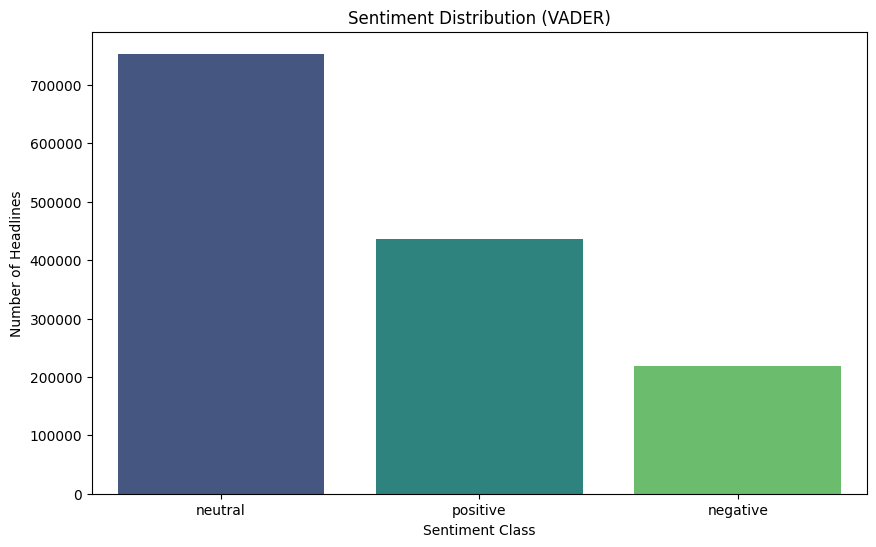

C:\Users\Akram 1\AppData\Local\Temp\ipykernel_21948\2853274644.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='textblob_sentiment_class', data=df, palette='viridis')


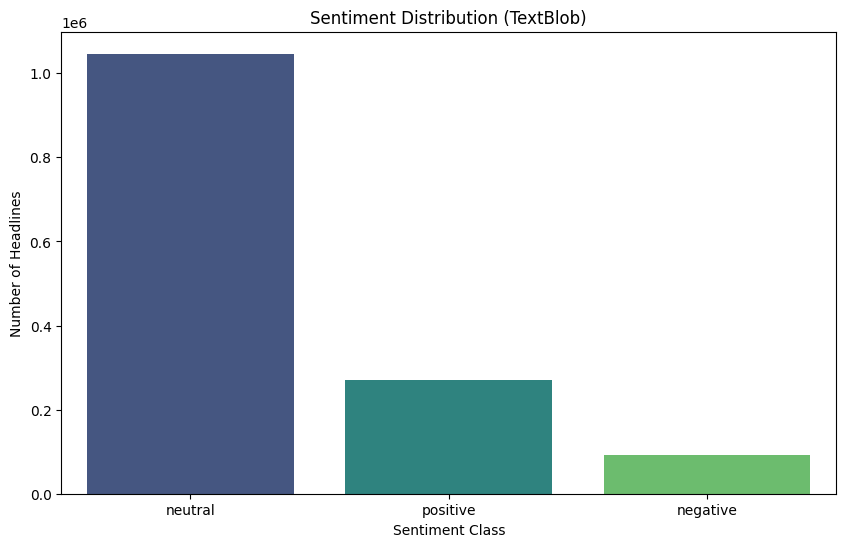

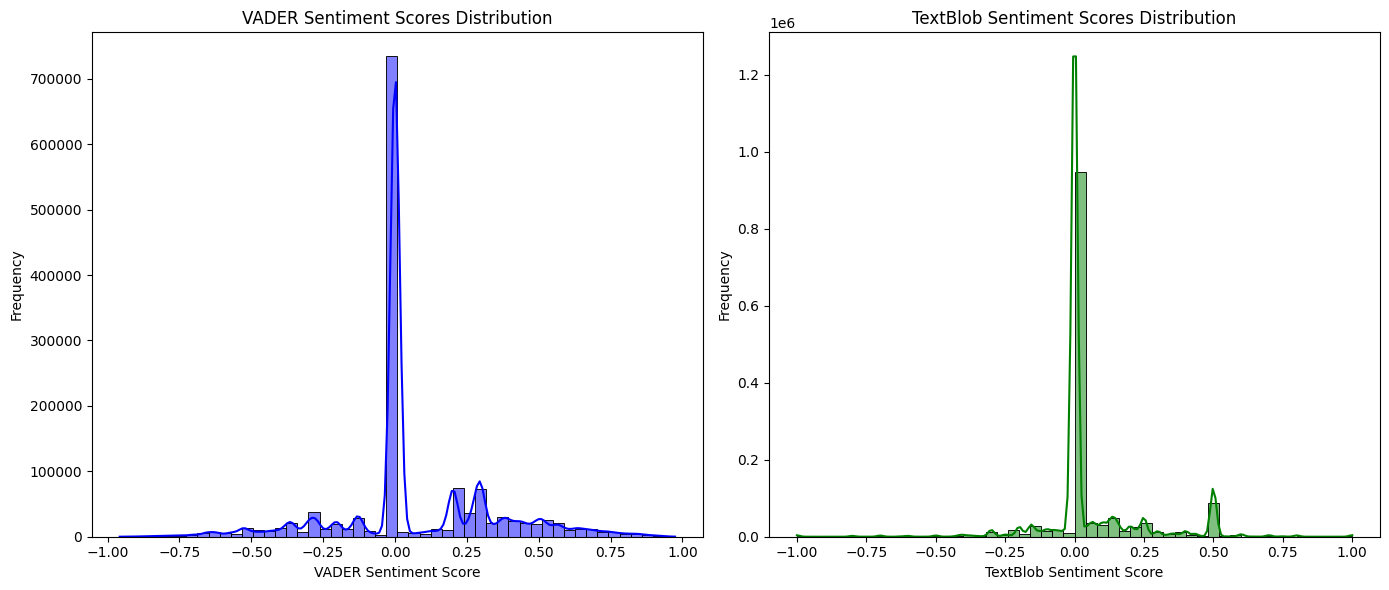

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='vader_sentiment_class', data=df, palette='viridis')
plt.title('Sentiment Distribution (VADER)')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Headlines')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='textblob_sentiment_class', data=df, palette='viridis')
plt.title('Sentiment Distribution (TextBlob)')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Headlines')
plt.show()

# Sentiment Scores Histogram
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['vader_sentiment'], bins=50, color='blue', kde=True)
plt.title('VADER Sentiment Scores Distribution')
plt.xlabel('VADER Sentiment Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['textblob_sentiment'], bins=50, color='green', kde=True)
plt.title('TextBlob Sentiment Scores Distribution')
plt.xlabel('TextBlob Sentiment Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
